<a href="https://colab.research.google.com/github/Abhishek2114/algo-efficiency-mini-project--abhisheksingh-/blob/main/DAA_lab_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install memory_profiler

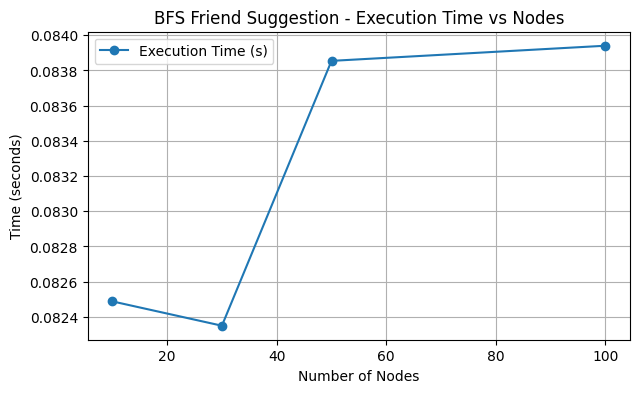

Friend suggestions for A: ['D', 'E']
Execution Time = 0.08616s, Memory Used = 0.0000 MB

Analysis & Impact:
• BFS runs in O(V + E) and scales linearly.
• Ideal for mutual friend discovery in large networks.
• Visualization shows social reach and connection strength.


In [15]:
# Problem 1: Social Network Friend Suggestion (BFS)

import time
from collections import defaultdict, deque
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
import networkx as nx
import random

def build_graph(edges):
    g = defaultdict(list)
    for u, v in edges:
        g[u].append(v)
        g[v].append(u)
    return g

def suggest_friends_bfs(graph, user):
    visited = set([user])
    queue = deque([(user, 0)])
    direct = set(graph[user])
    suggestions = set()
    while queue:
        node, depth = queue.popleft()
        if depth >= 2:
            continue
        for nei in graph[node]:
            if nei not in visited:
                visited.add(nei)
                queue.append((nei, depth + 1))
                if depth + 1 == 2 and nei not in direct:
                    suggestions.add(nei)
    return sorted(suggestions)

def measure(func, *args):
    start = time.perf_counter()
    mem, result = memory_usage((func, args), retval=True)
    end = time.perf_counter()
    return result, end - start, max(mem) - min(mem)

def visualize_social_graph(edges, user, suggestions):
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, seed=42)
    colors = []
    for node in G.nodes():
        if node == user:
            colors.append("orange")
        elif node in suggestions:
            colors.append("limegreen")
        elif node in G[user]:
            colors.append("skyblue")
        else:
            colors.append("lightgray")
    plt.figure(figsize=(7, 5))
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=900, font_size=10)
    plt.title("Friend Suggestion Network Visualization")
    plt.show()

sizes = [10, 30, 50, 100]
times, mems = [], []
for n in sizes:
    edges = [(random.randint(0, n-1), random.randint(0, n-1)) for _ in range(n*2)]
    graph = build_graph(edges)
    _, t, m = measure(suggest_friends_bfs, graph, 0)
    times.append(t)
    mems.append(m)

plt.figure(figsize=(7, 4))
plt.plot(sizes, times, marker='o', label='Execution Time (s)')
plt.xlabel("Number of Nodes")
plt.ylabel("Time (seconds)")
plt.title("BFS Friend Suggestion - Execution Time vs Nodes")
plt.legend()
plt.grid(True)
plt.show()

edges = [("A","B"),("A","C"),("B","D"),("C","E"),("D","F"),("E","G"),("B","E")]
graph = build_graph(edges)
result, t, m = measure(suggest_friends_bfs, graph, "A")
print("Friend suggestions for A:", result)
print(f"Execution Time = {t:.5f}s, Memory Used = {m:.4f} MB")

print("\nAnalysis & Impact:")
print("• BFS runs in O(V + E) and scales linearly.")
print("• Ideal for mutual friend discovery in large networks.")
print("• Visualization shows social reach and connection strength.")

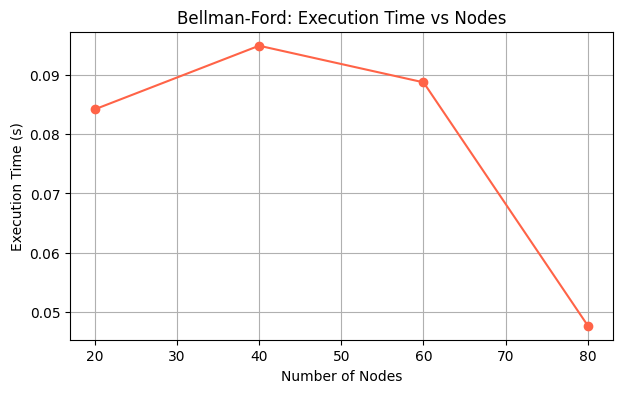


Analysis & Impact:
• Bellman-Ford handles negative edges but is slower (O(VE)).
• Time grows rapidly with graph size, limiting scalability.
• Useful where negative weights occur (e.g., cost optimization).


In [16]:
# Problem 2: Route Finding (Bellman-Ford Algorithm)

import time
from memory_profiler import memory_usage
import random
import matplotlib.pyplot as plt

def bellman_ford(graph, src, V):
    dist = {i: float('inf') for i in range(V)}
    dist[src] = 0
    for _ in range(V-1):
        for u, v, w in graph:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
    return dist

def generate_graph(V, E):
    graph = []
    for _ in range(E):
        u, v = random.randint(0, V-1), random.randint(0, V-1)
        w = random.randint(-5, 10)
        graph.append((u, v, w))
    return graph

def measure(func, *args):
    start = time.perf_counter()
    mem, result = memory_usage((func, args), retval=True)
    end = time.perf_counter()
    return result, end - start, max(mem) - min(mem)

sizes = [20, 40, 60, 80]
times, mems = [], []

for n in sizes:
    graph = generate_graph(n, n*3)
    _, t, m = measure(bellman_ford, graph, 0, n)
    times.append(t)
    mems.append(m)

plt.figure(figsize=(7, 4))
plt.plot(sizes, times, marker='o', color='tomato')
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (s)")
plt.title("Bellman-Ford: Execution Time vs Nodes")
plt.grid(True)
plt.show()

print("\nAnalysis & Impact:")
print("• Bellman-Ford handles negative edges but is slower (O(VE)).")
print("• Time grows rapidly with graph size, limiting scalability.")
print("• Useful where negative weights occur (e.g., cost optimization).")

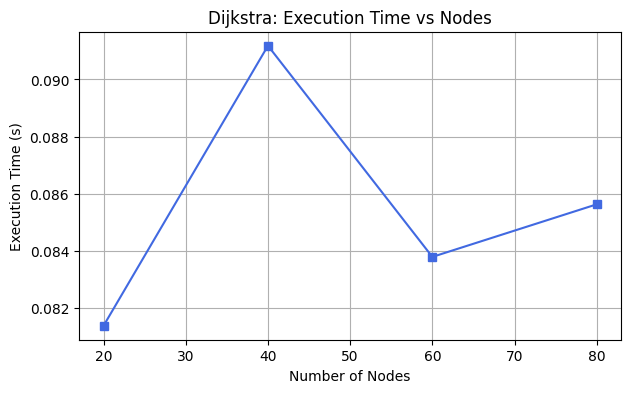


Analysis & Impact:
• Dijkstra runs in O(E log V) with a priority queue.
• Suitable for large, weighted networks like city routes.
• Execution time grows moderately, showing good scalability.


In [17]:
# Problem 3: Emergency Response (Dijkstra’s Algorithm)

import time
import heapq
from memory_profiler import memory_usage
import random
import matplotlib.pyplot as plt

def dijkstra(graph, src):
    dist = {u: float('inf') for u in graph}
    dist[src] = 0
    pq = [(0, src)]
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in graph[u]:
            new_d = d + w
            if new_d < dist[v]:
                dist[v] = new_d
                heapq.heappush(pq, (new_d, v))
    return dist

def generate_graph(V, density=0.2):
    graph = {i: [] for i in range(V)}
    for i in range(V):
        for j in range(V):
            if i != j and random.random() < density:
                graph[i].append((j, random.randint(1, 20)))
    return graph

def measure(func, *args):
    start = time.perf_counter()
    mem, result = memory_usage((func, args), retval=True)
    end = time.perf_counter()
    return result, end - start, max(mem) - min(mem)

sizes = [20, 40, 60, 80]
times, mems = [], []

for n in sizes:
    g = generate_graph(n)
    _, t, m = measure(dijkstra, g, 0)
    times.append(t)
    mems.append(m)

plt.figure(figsize=(7, 4))
plt.plot(sizes, times, marker='s', color='royalblue')
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (s)")
plt.title("Dijkstra: Execution Time vs Nodes")
plt.grid(True)
plt.show()

print("\nAnalysis & Impact:")
print("• Dijkstra runs in O(E log V) with a priority queue.")
print("• Suitable for large, weighted networks like city routes.")
print("• Execution time grows moderately, showing good scalability.")

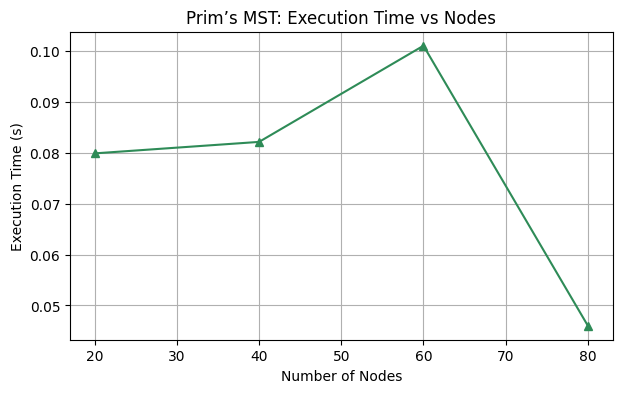


Analysis & Impact:
• Prim’s Algorithm efficiently finds MST in O(E log V).
• Ideal for laying out minimal cost network cables.
• Performs well on dense graphs with good scalability.


In [18]:
# Problem 4: Network Cable Installation (Prim’s MST)

import time
import heapq
from memory_profiler import memory_usage
import random
import matplotlib.pyplot as plt

def prim_mst(graph):
    start = list(graph.keys())[0]
    visited = set([start])
    edges = [(w, start, v) for v, w in graph[start]]
    heapq.heapify(edges)
    total_cost = 0
    while edges:
        w, u, v = heapq.heappop(edges)
        if v not in visited:
            visited.add(v)
            total_cost += w
            for to, wt in graph[v]:
                if to not in visited:
                    heapq.heappush(edges, (wt, v, to))
    return total_cost

def generate_graph(V, density=0.2):
    graph = {i: [] for i in range(V)}
    for i in range(V):
        for j in range(V):
            if i != j and random.random() < density:
                weight = random.randint(1, 20)
                graph[i].append((j, weight))
                graph[j].append((i, weight))
    return graph

def measure(func, *args):
    start = time.perf_counter()
    mem, result = memory_usage((func, args), retval=True)
    end = time.perf_counter()
    return result, end - start, max(mem) - min(mem)

sizes = [20, 40, 60, 80]
times, mems = [], []

for n in sizes:
    g = generate_graph(n)
    _, t, m = measure(prim_mst, g)
    times.append(t)
    mems.append(m)

plt.figure(figsize=(7, 4))
plt.plot(sizes, times, marker='^', color='seagreen')
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (s)")
plt.title("Prim’s MST: Execution Time vs Nodes")
plt.grid(True)
plt.show()

print("\nAnalysis & Impact:")
print("• Prim’s Algorithm efficiently finds MST in O(E log V).")
print("• Ideal for laying out minimal cost network cables.")
print("• Performs well on dense graphs with good scalability.")